In [1]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import numpy as np
import matplotlib.pyplot as plt
from mssfp.phantoms import simple, phantom, shepp_logan

In [2]:
print(simple.tissue_parameters)

{0: ('none', 0, 0, 0), 1: ('csf', 4.2, 1.99, 0), 2: ('gray-matter', 0.9, 0.1, 0), 3: ('white-matter', 0.6, 0.08, 0), 4: ('muscle', 0.9, 0.05, 0), 5: ('liver', 0.5, 0.04, 0), 6: ('fat', 0.25, 0.07, 420), 7: ('tendon', 0.4, 0.005, 0), 8: ('proteins', 0.25, 0.001, 0)}


In [3]:
dataset = phantom.generate_ssfp_dataset(phantom_type='block', slices=2, shape=256, ids=[1, 2, 3, 4], padding=8, f=100, df=1/3e-3, alpha = np.deg2rad(60))
print(dataset['M'].shape)

Generating phantom...
Generating SSFP dataset...
Dataset complete.
Dataset shape: (2, 256, 256, 4)
(2, 256, 256, 4)


c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:64: RuntimeWarning: divide by zero encountered in divide
  E1 = np.where(T1 > 0, np.exp(-TR / T1), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:65: RuntimeWarning: divide by zero encountered in divide
  E2 = np.where(T2 > 0, np.exp(-TR / T2), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:91: RuntimeWarning: divide by zero encountered in divide
  T2_decay = np.where(T2 > 0, np.exp(-TE / T2), 0)


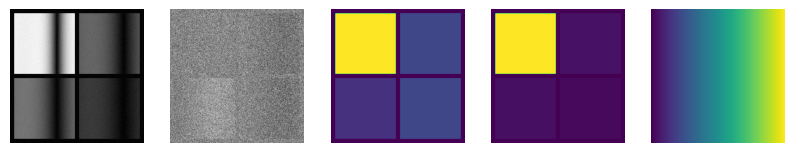

In [4]:
slice = 0
pc_index = 0

plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(np.abs(dataset['M'][0,:,:,pc_index]), cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(dataset['M'][slice, :, :, pc_index].real, cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(dataset['t1'][slice, :, :])
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(dataset['t2'][slice, :, :])
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(dataset['fieldmap'][slice, :, :])
plt.axis('off')
plt.show()

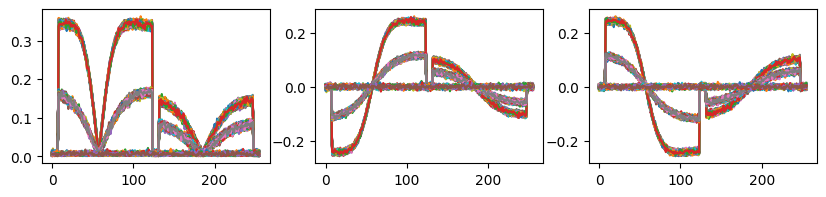

In [5]:
Mslice = dataset['M'][0,:,:,1].T

plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
plt.plot(np.abs(Mslice))
plt.subplot(1,3,2)
plt.plot(Mslice.real)
plt.subplot(1,3,3)
plt.plot(Mslice.imag)
plt.show()

In [6]:
dataset2 = phantom.generate_ssfp_dataset(phantom_type='block', slices=256, shape=256, ids=[1, 2, 3, 4], padding=8, f=100, df=1/3e-3, alpha = np.deg2rad(60), npcs=4, sigma=0.005, fn_offset=5, fn_sigma=5, rotation=180, useRotate=True, useDeform=True)
dataset2['M'].shape

Generating phantom...
Generating SSFP dataset...
Dataset complete.
Dataset shape: (256, 256, 256, 4)


(256, 256, 256, 4)

(256, 256)


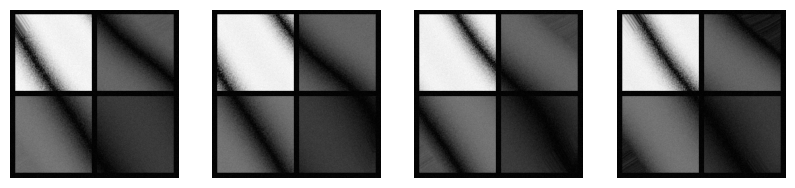

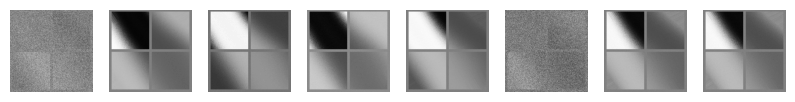

In [11]:
slice = 1
print(dataset2['M'][slice,:,:,0].shape)

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.abs(dataset2['M'][slice,:,:,i]), cmap='gray')
    plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,8,2*i+1)
    plt.imshow(dataset2['M'][slice,:,:,i].real, cmap='gray')
    plt.axis('off')
    plt.subplot(1,8,2*i+2)
    plt.imshow(dataset2['M'][slice,:,:,i].imag, cmap='gray')
    plt.axis('off')
plt.show()